 ## NYC Taxi Trip Duration EDA
            
                     BY

                Pritam Pathrabe



![alt text](https://images.unsplash.com/photo-1418075285575-c402f1f7340f?ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80)


***The aim of this assignment is just to explore the dataset and generate insights from it.***

Here is the description of all the variables / features available in the dataset which will help us to perform EDA:

1. id - a unique identifier for each trip

2. vendor_id - a code indicating the provider associated with the trip record

3. pickup_datetime - date and time when the meter was engaged

4. dropoff_datetime - date and time when the meter was disengaged

5. passenger_count - the number of passengers in the vehicle (driver entered value)

6. pickup_longitude - the longitude where the meter was engaged

7. pickup_latitude - the latitude where the meter was engaged

8. dropoff_longitude - the longitude where the meter was disengaged

9. dropoff_latitude - the latitude where the meter was disengaged

10. store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

11. trip_duration - (target) duration of the trip in seconds


In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


In [2]:
#Reading and checking csv file

data=pd.read_csv('nyc_taxi_trip_duration.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
data.shape

(729322, 11)

In [4]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
data['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [6]:
#Visualising data's metadata

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [7]:
#managing Datetime and extracting month,day and hour data
for i in['pickup','dropoff']:
    data['{}_datetime'.format(i)] = pd.to_datetime(data['{}_datetime'.format(i)])
    data['{}_month'.format(i)] = data['{}_datetime'.format(i)].apply(lambda x:x.month)
    data['{}_day_name'.format(i)] = data['{}_datetime'.format(i)].apply(lambda x:x.day_name())
    data['{}_hour'.format(i)] = data['{}_datetime'.format(i)].apply(lambda x:x.hour)

In [8]:
#visualising fresh data now:

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,Monday,16,2,Monday,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,Friday,23,3,Friday,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,Sunday,17,2,Sunday,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,Tuesday,9,1,Tuesday,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,Wednesday,6,2,Wednesday,6


In [9]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes


vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_month           int64
pickup_hour            int64
dropoff_month          int64
dropoff_hour           int64
dtype: object

In [10]:
# grouping variables:

numerical = ["trip_duration" , "pickup_hour" , "dropoff_hour"]
categorical = ["passenger_count","pickup_month","dropoff_month","pickup_day_name","dropoff_day_name"]
cat_geofence = ["pickup_longitude", "pickup_latitude" , "dropoff_longitude","dropoff_latitude"]

#  UNIVARIAT_ANALYSIS_NUMERICAL_VARIABLE

In [11]:
def UVA_numeric(df, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = df[i].min()
    maxi = df[i].max()
    ran = df[i].max()-df[i].min()
    mean = df[i].mean()
    median = df[i].median()
    st_dev = df[i].std()
    skew = df[i].skew()
    kurt = df[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(df[i], fill=True)
    sns.lineplot(x=points, y=[0,0], color='black', label="std_dev")
    sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label="min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

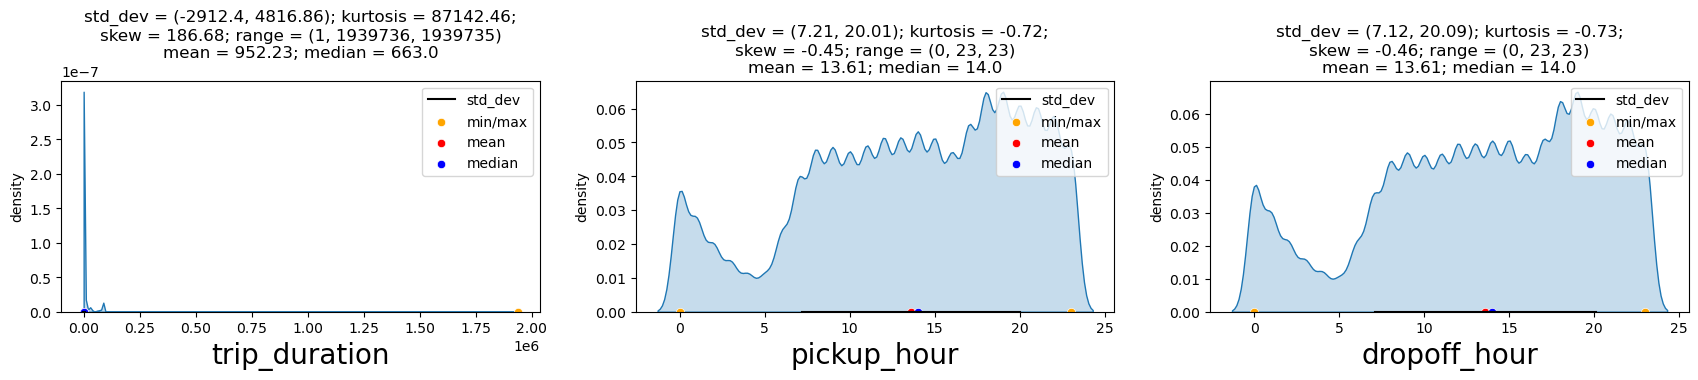

In [12]:
UVA_numeric(data , numerical)

In [13]:
data['passenger_count'] = data['passenger_count'].astype('category')
data['pickup_month'] = data['pickup_month'].astype('category')
data['dropoff_month'] = data['dropoff_month'].astype('category')

In [14]:
# category datatypes
data.select_dtypes(include=['category']).dtypes

passenger_count    category
pickup_month       category
dropoff_month      category
dtype: object

# UNIVARIAT_ANALYSIS_CATEGORICAL_VARIABLE

In [15]:
def UVA_category(df, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = df[i].value_counts(normalize = True)
    n_uni = df[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x=norm_count.index, y=norm_count, order=norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

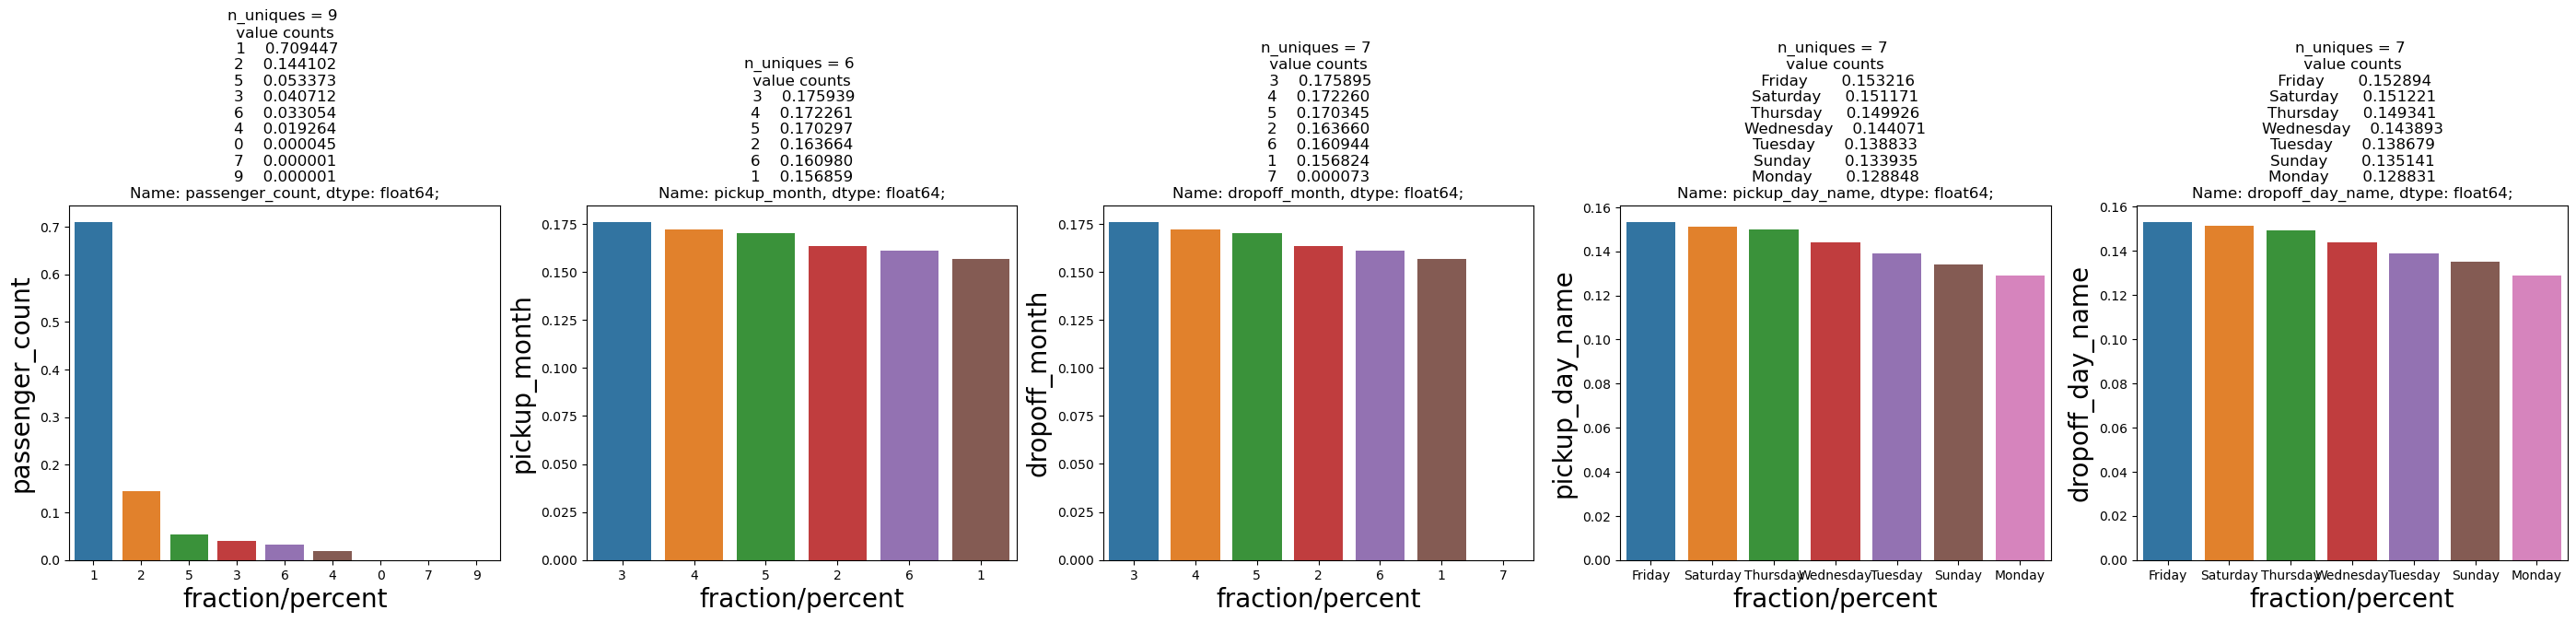

In [16]:
UVA_category(data, categorical)

In [17]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
data['vendor_id'] = data['vendor_id'].astype('category')

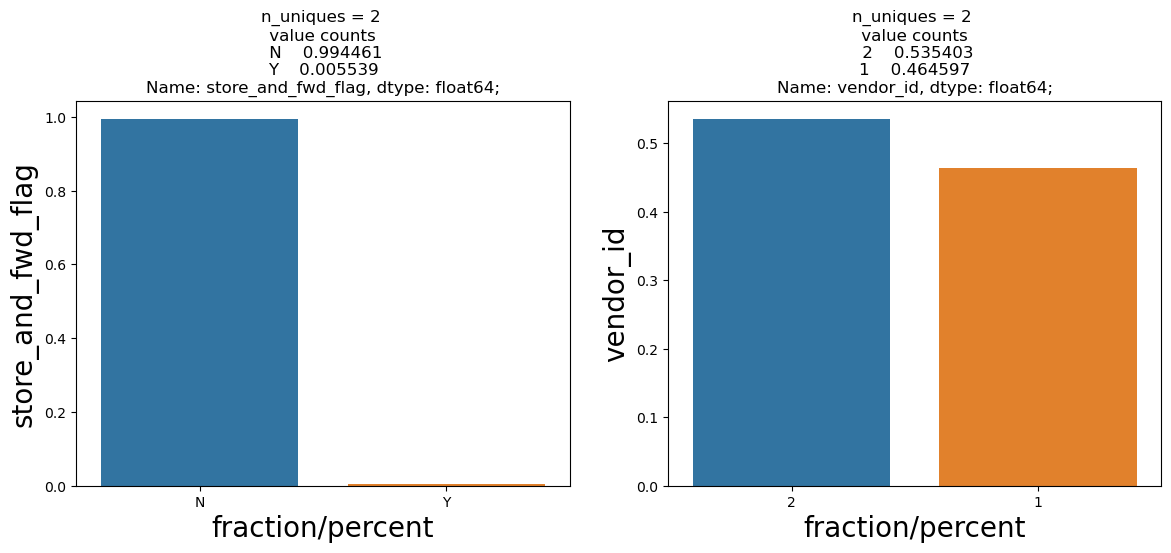

In [18]:
UVA_category(data,['store_and_fwd_flag','vendor_id'])

In [19]:
data['pickup_time_bins'] = pd.cut(x = data['pickup_hour'], bins=[1,5,10,15,20,25,30])
data['pickup_time_bins'].value_counts(normalize = True)

(15, 20]    0.297490
(10, 15]    0.260946
(5, 10]     0.211611
(20, 25]    0.171810
(1, 5]      0.058143
(25, 30]    0.000000
Name: pickup_time_bins, dtype: float64

In [20]:
data['pickup_datetime'].min(), data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

In [21]:
data['trip_duration'].min(), data['trip_duration'].max(),data['trip_duration'].mean()

(1, 1939736, 952.2291333594764)

<Axes: xlabel='pickup_time_bins', ylabel='count'>

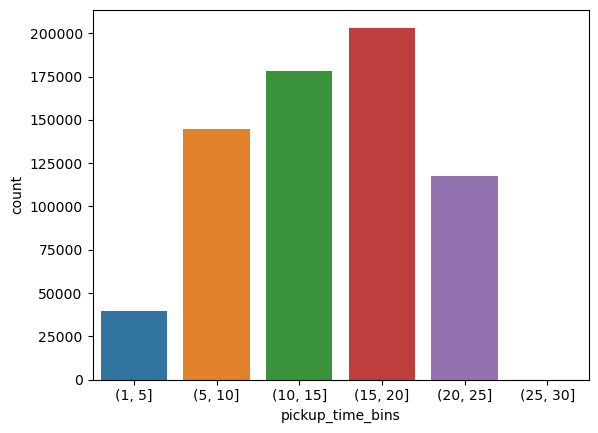

In [22]:
sns.countplot(x = 'pickup_time_bins' , data = data)

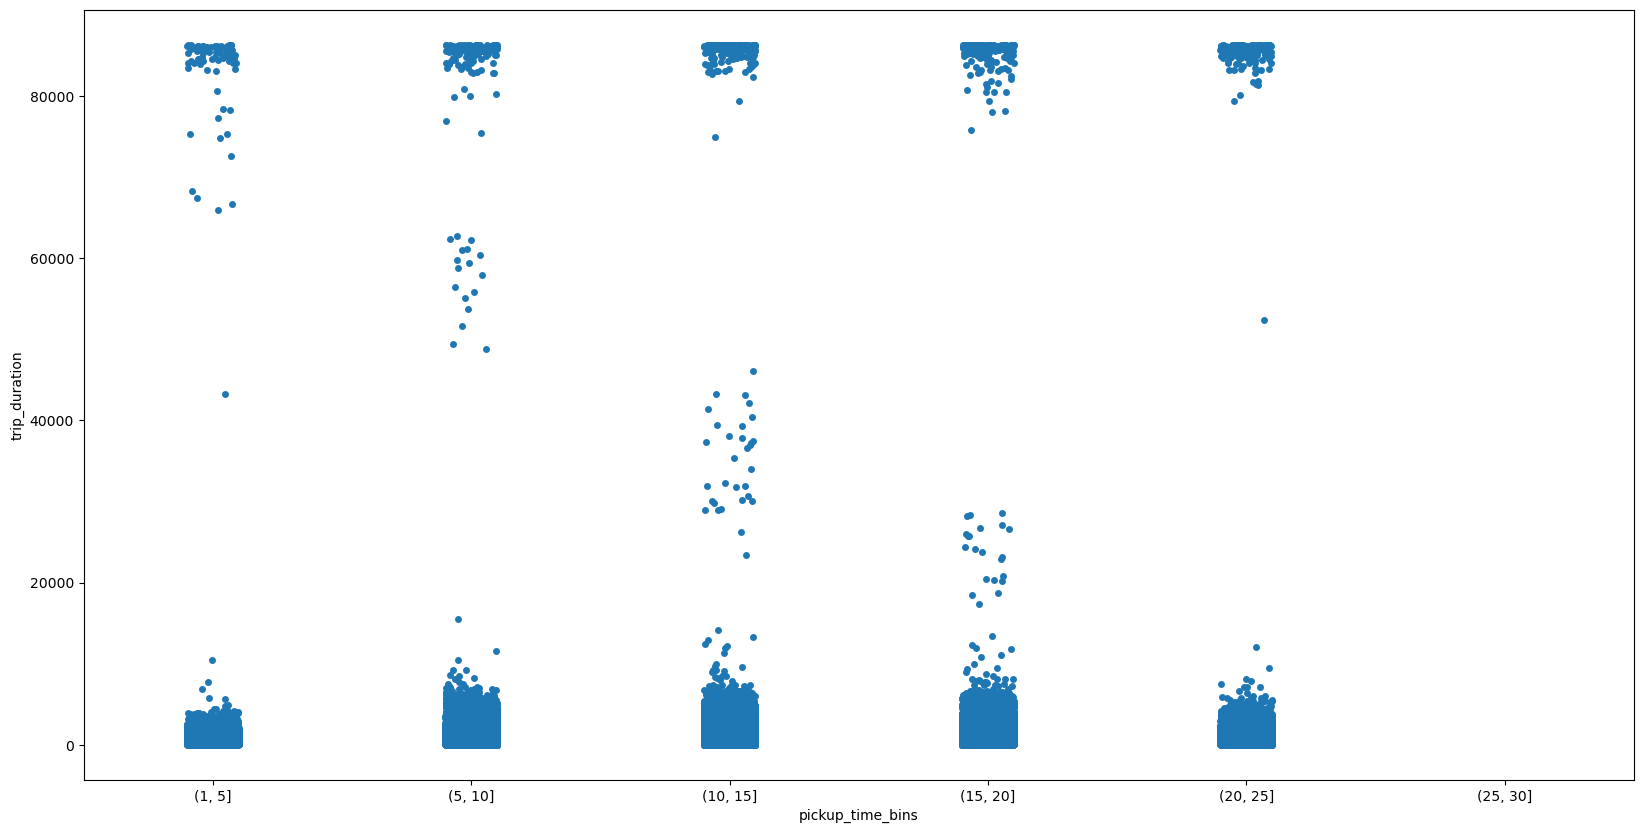

In [23]:
plt.figure(figsize = (20,10))
sns.stripplot(x="pickup_time_bins", y="trip_duration",data=data)
plt.show()



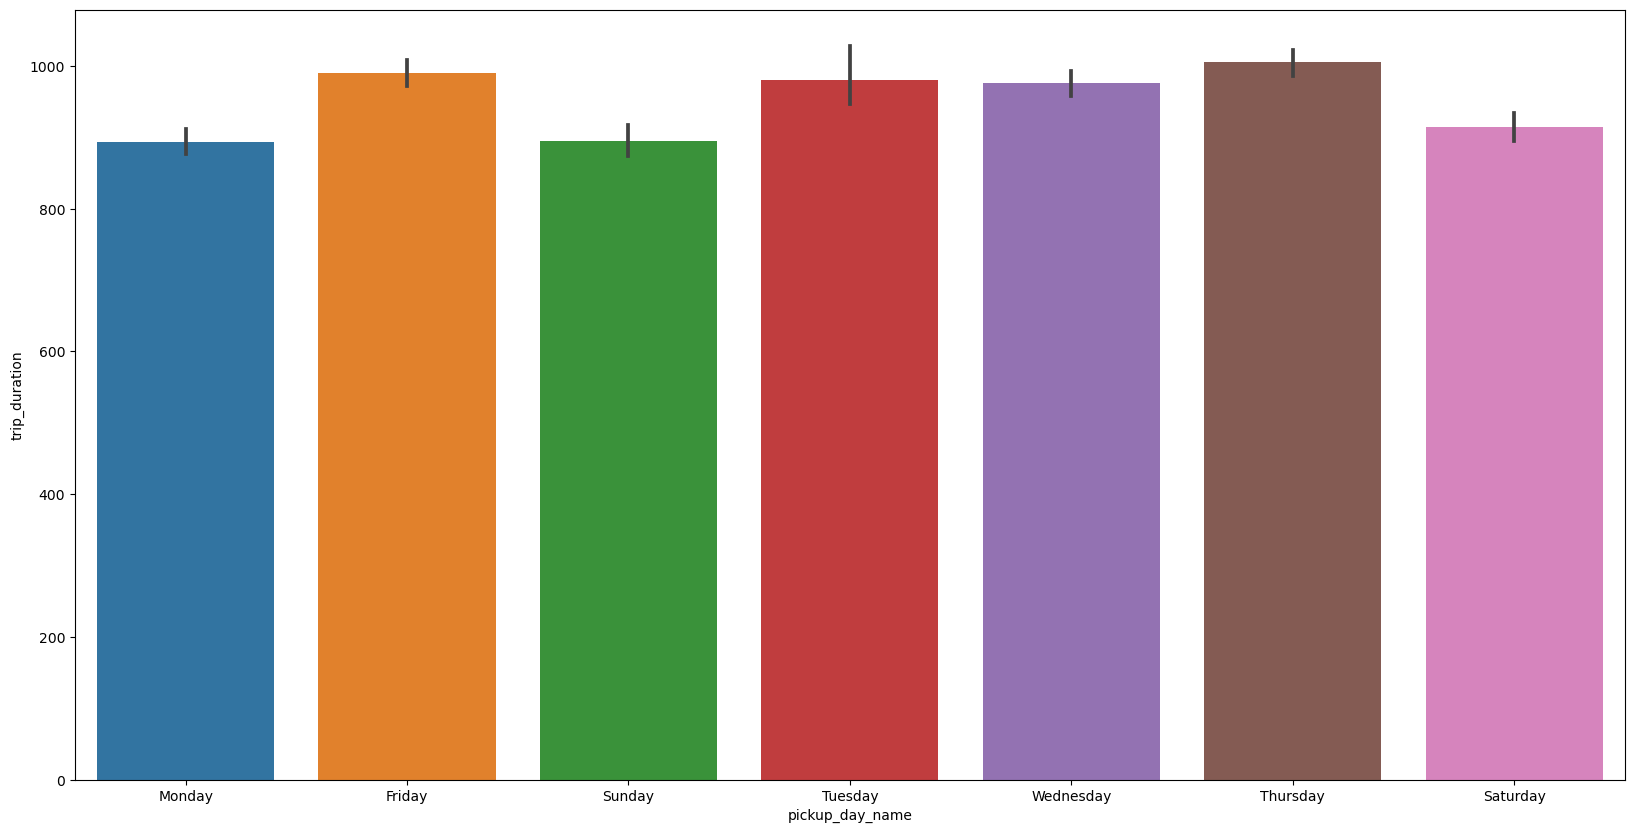

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(x="pickup_day_name", y="trip_duration",data=data)
plt.show()

## Univariate Analysis: Outliers

In [25]:
def UVA_outlier(data, var_group, include_outlier = True):
  
  
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True


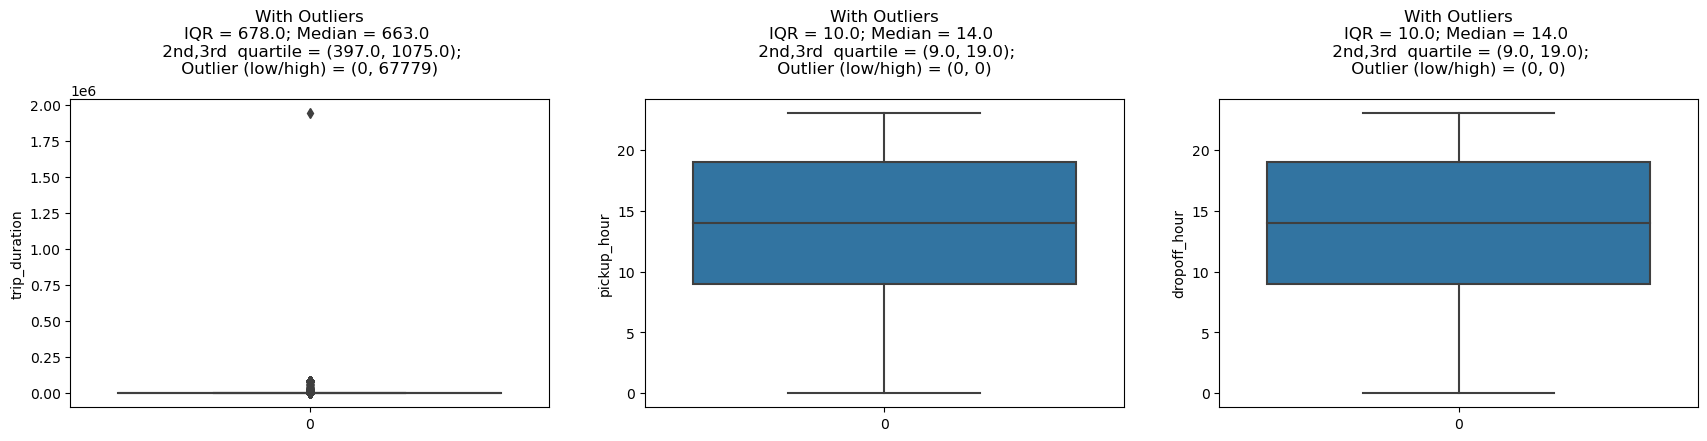

In [26]:
UVA_outlier(data, numerical,)

True
True
True
True


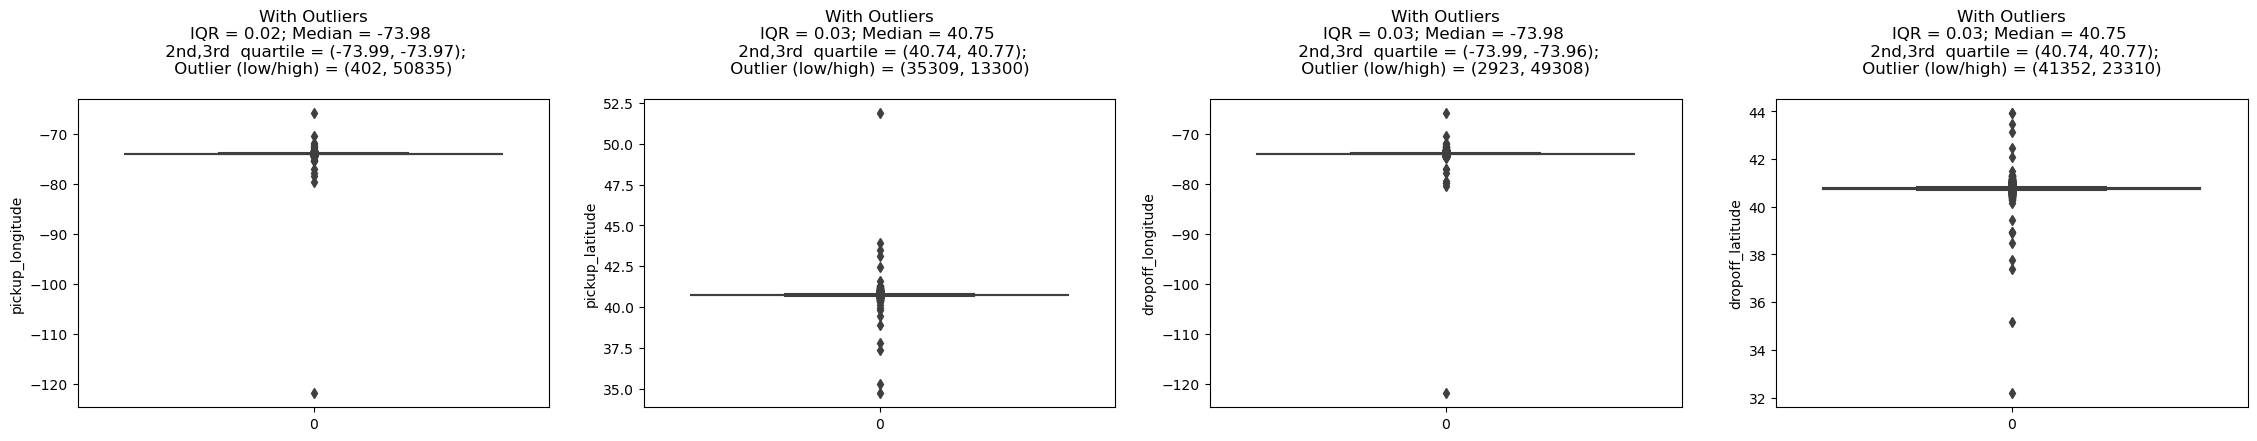

In [27]:
UVA_outlier(data, cat_geofence,)

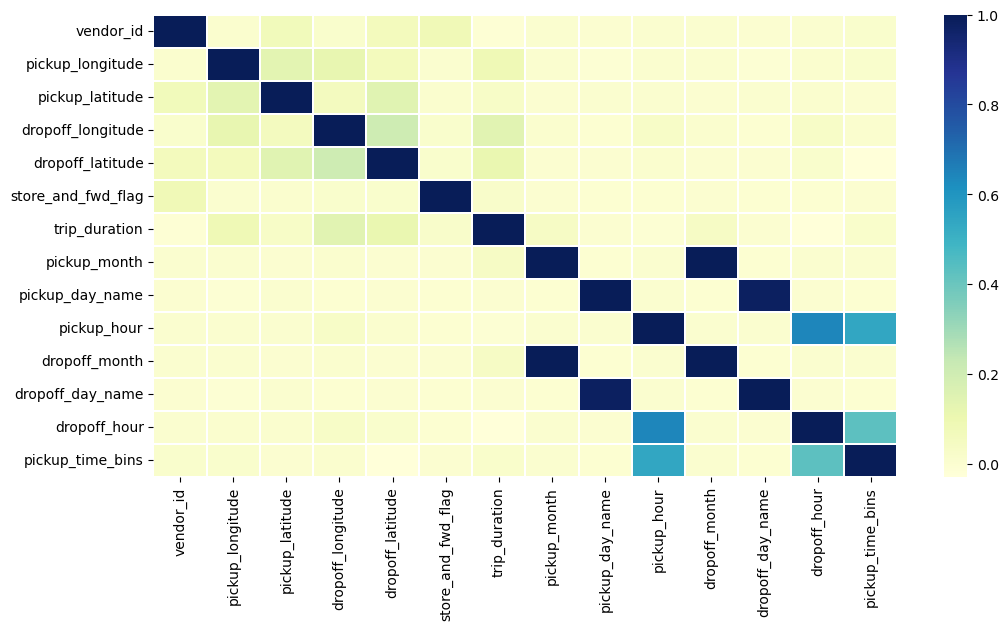

In [28]:
plt.figure(figsize=(12, 6))
data = data.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count',],
        axis=1)
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

# Bivariate Analysis : Numerical-Numerical

In [29]:
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_hour            int64
dropoff_hour           int64
dtype: object

In [30]:
correlation = numerical.dropna().corr()
correlation

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour
pickup_longitude,1.000000,0.047635,0.780647,0.118473,0.035447,0.010754,0.011170
pickup_latitude,0.047635,1.000000,0.119970,0.479352,-0.038163,0.011433,0.018061
dropoff_longitude,0.780647,0.119970,1.000000,0.149598,0.020664,-0.022014,-0.023193
dropoff_latitude,0.118473,0.479352,0.149598,1.000000,-0.028283,0.014257,0.018173
trip_duration,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.002979,0.003027
pickup_hour,0.010754,0.011433,-0.022014,0.014257,0.002979,1.000000,0.934591
dropoff_hour,0.011170,0.018061,-0.023193,0.018173,0.003027,0.934591,1.000000


C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5283: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


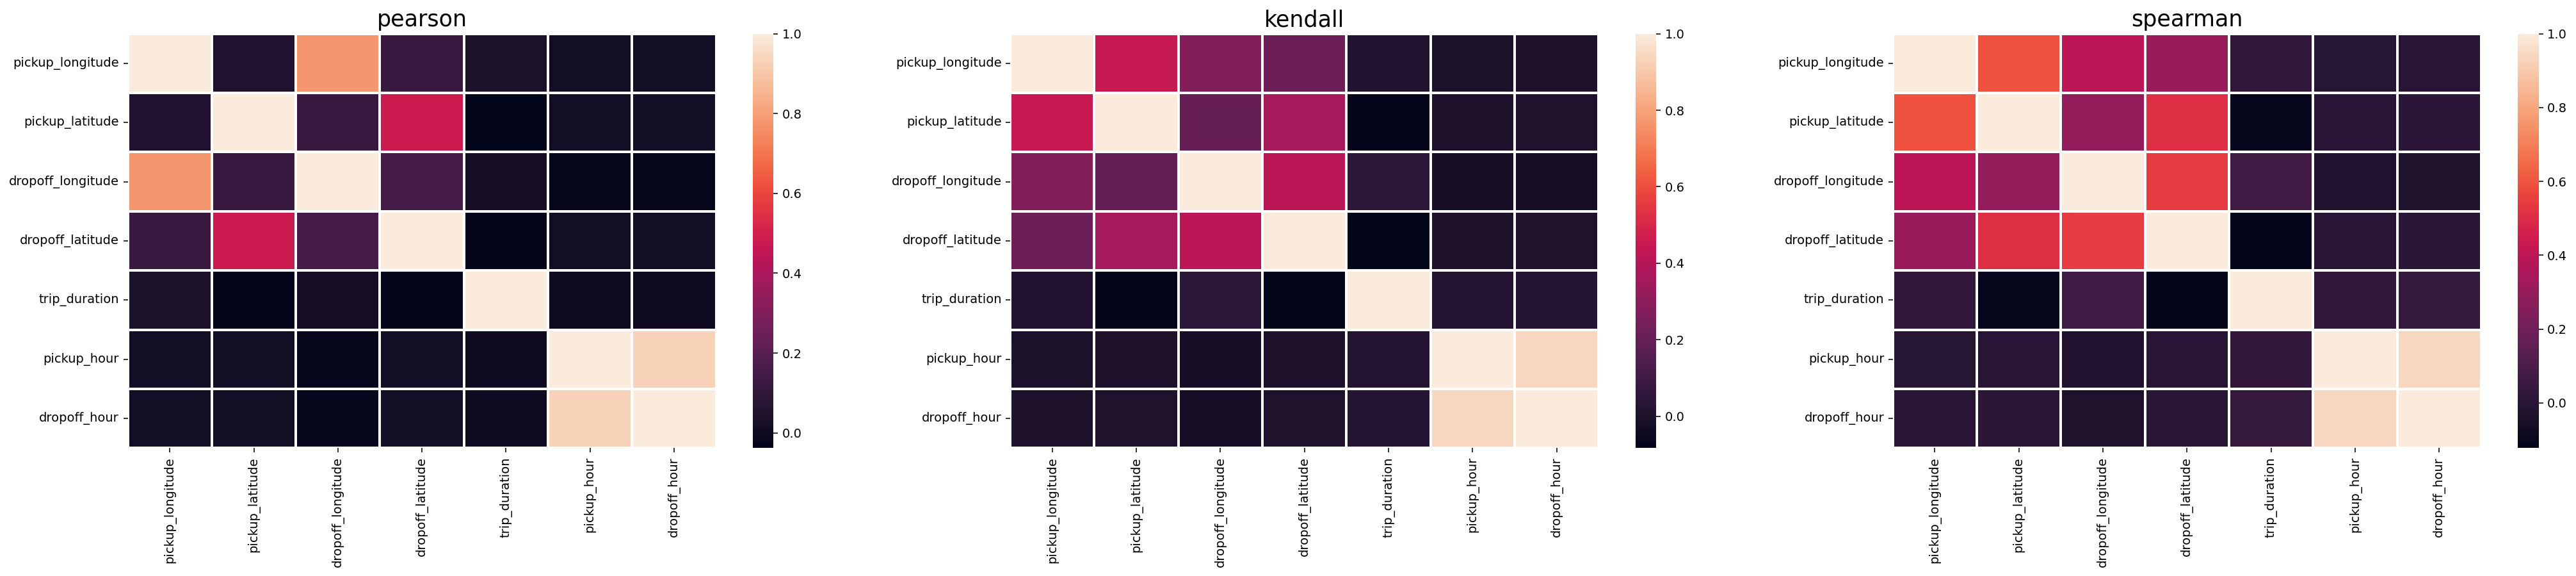

In [31]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)